In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Test SecureAgent with Jupyter
print("SecureAgent Test")

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 21.6MB/s]
100% 149M/149M [00:07<00:00, 19.7MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []
  #Iterate through directories in training path
  for label in os.listdir(path):
    label_path = os.path.join(path,label)
    #Check if it's a directory
    if(os.path.isdir(label_path)):
      #Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path,image)
        #Add class and paths to respective lists
        classes.append(label)
        class_paths.append(image_path)
  #Create a dataframe with a collected data
  df = pd.DataFrame({
      'class': classes,
      'class path': class_paths
  })

  return df


In [ ]:
tr_df = get_class_paths("/content/Training")
ts_df = get_class_paths("/content/Testing")

In [ ]:
tr_df

,class,class path
0,notumor,/content/Training/notumor/Tr-no_0794.jpg
1,notumor,/content/Training/notumor/Tr-no_1039.jpg
2,notumor,/content/Training/notumor/Tr-no_0972.jpg
3,notumor,/content/Training/notumor/Tr-no_0559.jpg
4,notumor,/content/Training/notumor/Tr-no_1252.jpg
...,...,...
5707,glioma,/content/Training/glioma/Tr-gl_0255.jpg
5708,glioma,/content/Training/glioma/Tr-gl_0182.jpg
5709,glioma,/content/Training/glioma/Tr-gl_0553.jpg
5710,glioma,/content/Training/glioma/Tr-gl_0380.jpg


In [ ]:
ts_df

,class,class path
0,notumor,/content/Testing/notumor/Te-no_0097.jpg
1,notumor,/content/Testing/notumor/Te-no_0301.jpg
2,notumor,/content/Testing/notumor/Te-noTr_0000.jpg
3,notumor,/content/Testing/notumor/Te-no_0222.jpg
4,notumor,/content/Testing/notumor/Te-no_0139.jpg
...,...,...
1306,glioma,/content/Testing/glioma/Te-gl_0280.jpg
1307,glioma,/content/Testing/glioma/Te-gl_0163.jpg
1308,glioma,/content/Testing/glioma/Te-gl_0194.jpg
1309,glioma,/content/Testing/glioma/Te-gl_0146.jpg


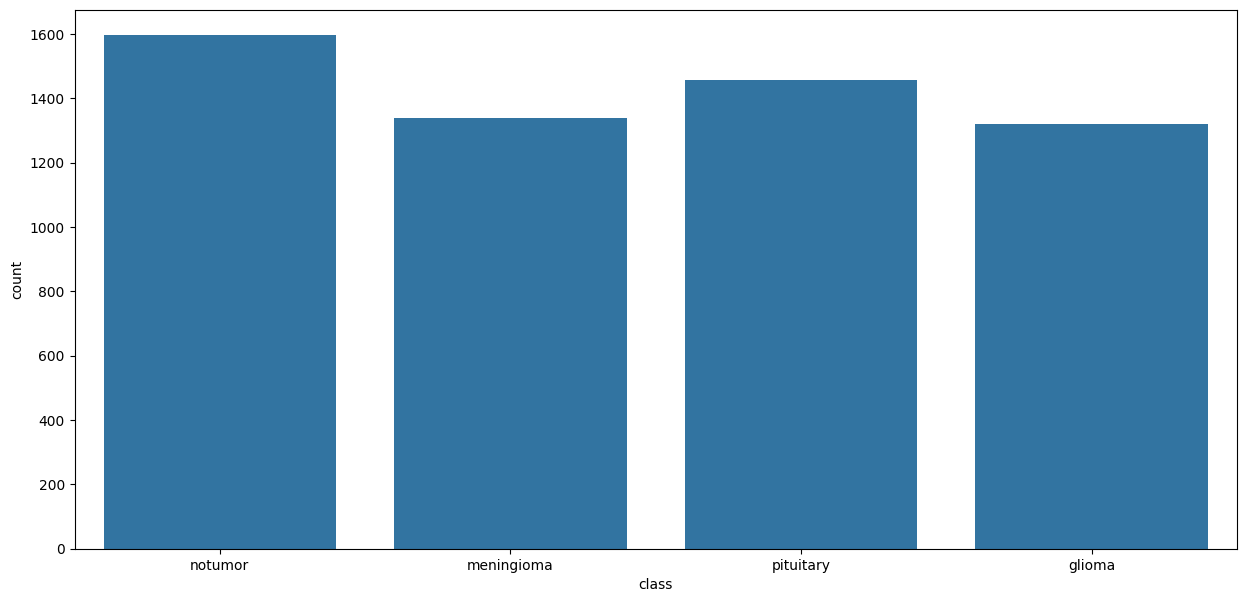

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = tr_df,x = tr_df['class'])

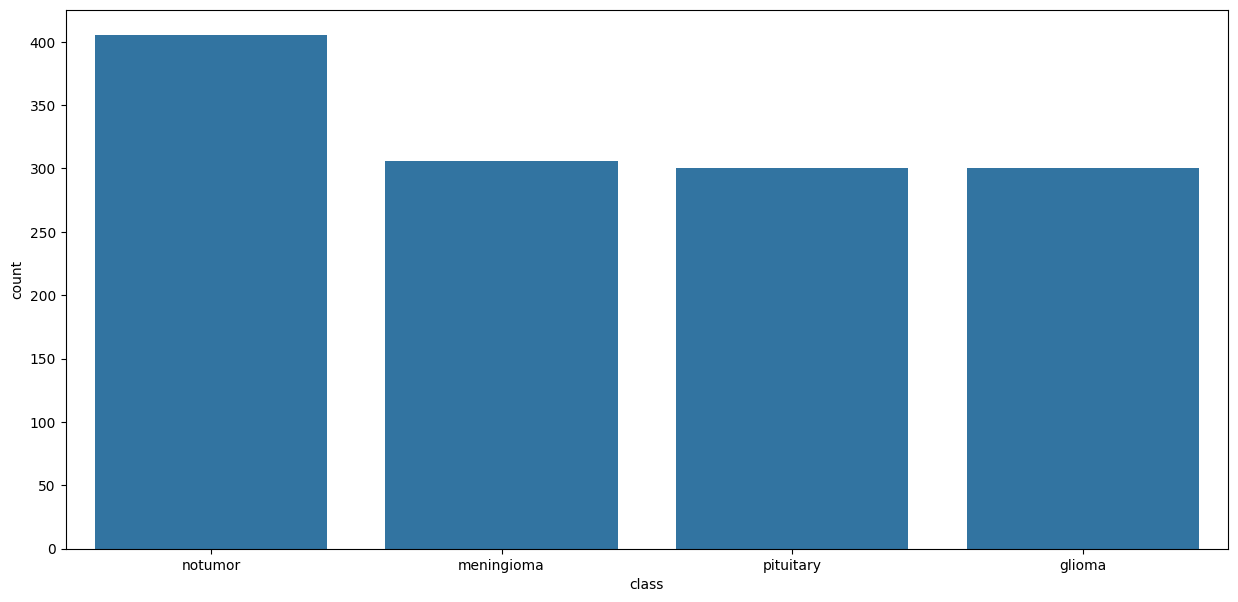

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = ts_df,x = ts_df['class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df,ts_df = train_test_split(ts_df,train_size=0.5,stratify=ts_df['class'])

In [ ]:
valid_df

,class,class path
89,notumor,/content/Testing/notumor/Te-no_0190.jpg
375,notumor,/content/Testing/notumor/Te-no_0111.jpg
1185,glioma,/content/Testing/glioma/Te-glTr_0009.jpg
920,pituitary,/content/Testing/pituitary/Te-pi_0159.jpg
63,notumor,/content/Testing/notumor/Te-no_0217.jpg
...,...,...
357,notumor,/content/Testing/notumor/Te-no_0194.jpg
637,meningioma,/content/Testing/meningioma/Te-me_0178.jpg
1172,glioma,/content/Testing/glioma/Te-gl_0130.jpg
352,notumor,/content/Testing/notumor/Te-no_0277.jpg


In [ ]:
ts_df

,class,class path
31,notumor,/content/Testing/notumor/Te-no_0276.jpg
527,meningioma,/content/Testing/meningioma/Te-me_0010.jpg
551,meningioma,/content/Testing/meningioma/Te-me_0227.jpg
48,notumor,/content/Testing/notumor/Te-no_0059.jpg
685,meningioma,/content/Testing/meningioma/Te-me_0240.jpg
...,...,...
1031,glioma,/content/Testing/glioma/Te-gl_0205.jpg
931,pituitary,/content/Testing/pituitary/Te-pi_0226.jpg
148,notumor,/content/Testing/notumor/Te-noTr_0005.jpg
466,meningioma,/content/Testing/meningioma/Te-me_0229.jpg


In [ ]:
#pre-process the dataset
batch_size = 32
img_size = (299,299)
image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))# rescale the image pixel values from (0 - 255) to (0 - 1) & randomly adjusts the brightness of images
ts_gen = ImageDataGenerator(rescale = 1/255)


In [ ]:
#workflows
tr_gen = image_generator.flow_from_dataframe(tr_df,x_col = 'class path',y_col = 'class',batch_size = batch_size,target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,x_col = 'class path',y_col = 'class',batch_size = batch_size,target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col = 'class path',y_col = 'class',batch_size = 16,target_size = img_size,shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


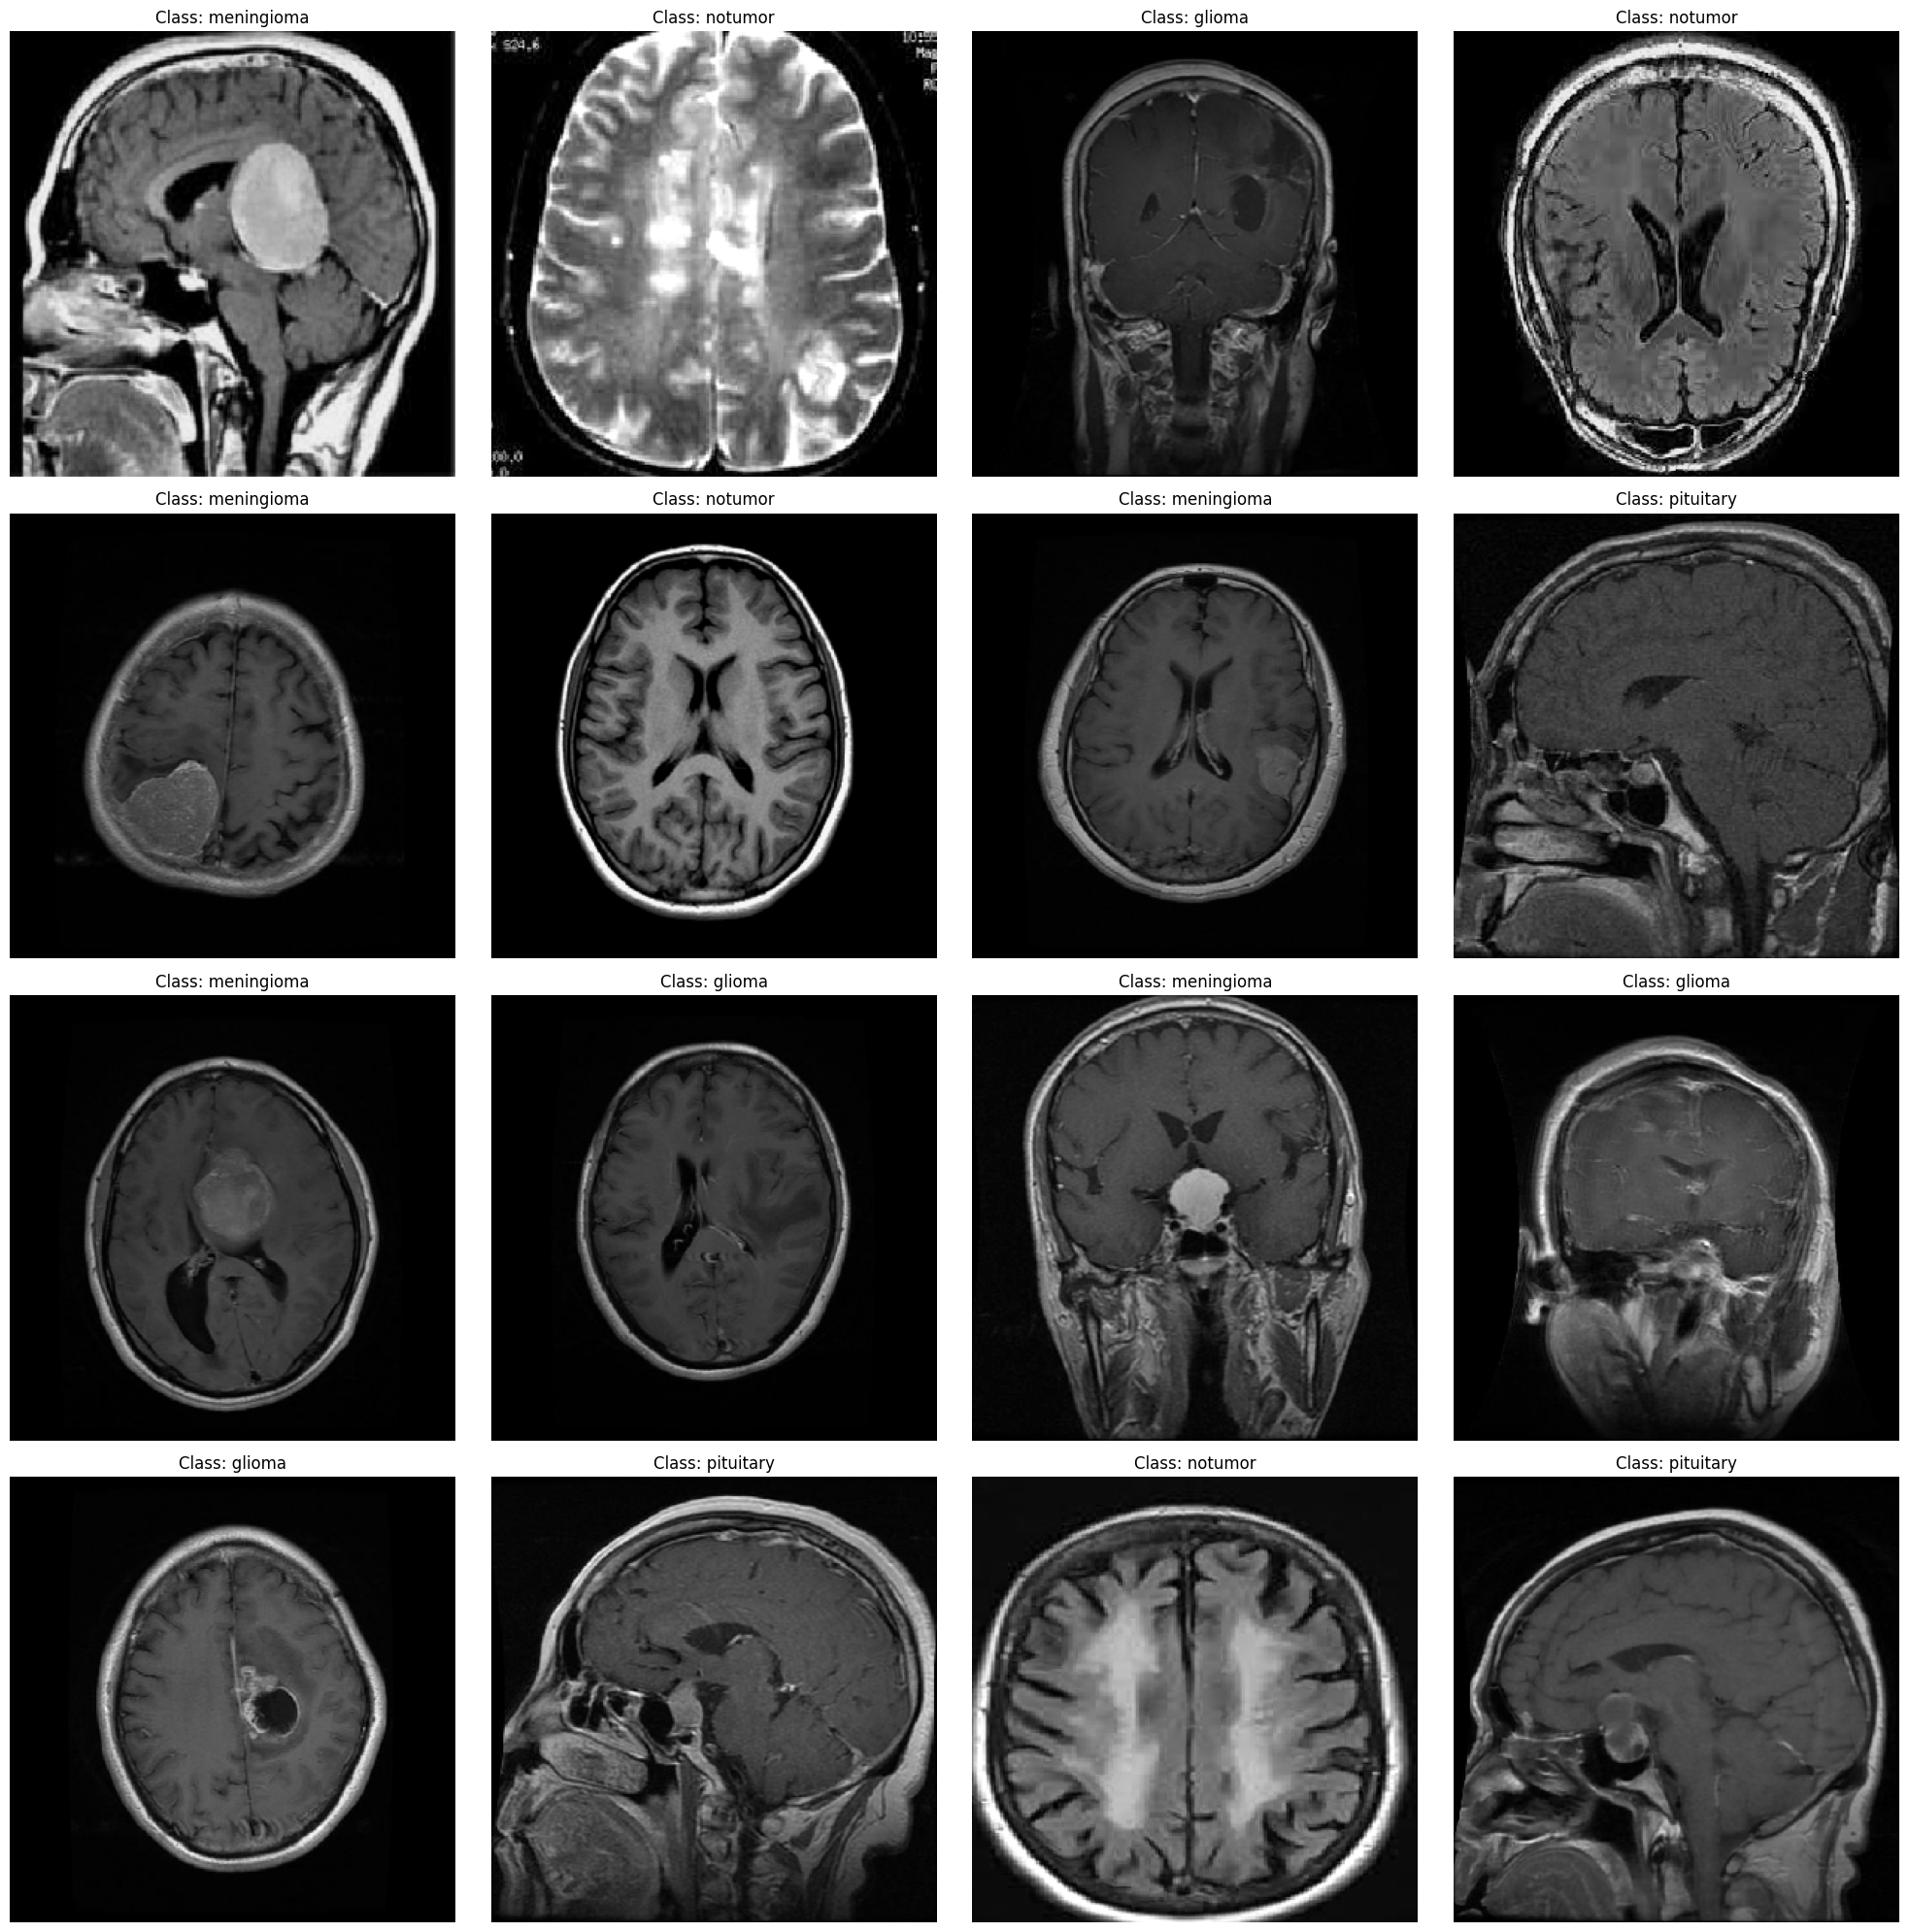

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #Get the class Index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3) #images are having 299 pixels,299 pixels and 3 indicates rgb format(red,green,blue)

#xception model
base_model = tf.keras.applications.Xception(include_top = False,weights = 'imagenet',input_shape = img_shape,pooling = "max")

# base_model = tf.keras.applications.ResNet50(include_top = False,weights = 'imagenet',input_shape = img_shape,pooling = "max")

# base_model = tf.keras.applications.EfficientNetB0(include_top = False,weights = 'imagenet',input_shape = img_shape,pooling = "max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128,activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4,activation = 'softmax')
])

#include_top=False: Removes the fully connected layers at the top of the pre-trained Xception model, allowing you to customize the output layers.
#weights='imagenet': Uses the weights pre-trained on the ImageNet dataset.
#pooling='max': Applies global max pooling to reduce the spatial dimensions into a single vector, which simplifies processing by the dense layers.

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate = 0.001),
              loss = "categorical_crossentropy",
              metrics = ['accuracy',Precision(),Recall()])#Accuracy - % of correct predictions, Precision - % of true possitives, Recall - % of true possitives when predicted.

In [ ]:
hist = model.fit(tr_gen,epochs = 5,validation_data = valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.7212 - loss: 0.7627 - precision: 0.8019 - recall: 0.6108 - val_accuracy: 0.9282 - val_loss: 0.1805 - val_precision: 0.9334 - val_recall: 0.9206
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 826ms/step - accuracy: 0.9738 - loss: 0.0743 - precision: 0.9755 - recall: 0.9718 - val_accuracy: 0.9588 - val_loss: 0.1083 - val_precision: 0.9631 - val_recall: 0.9573
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 823ms/step - accuracy: 0.9862 - loss: 0.0382 - precision: 0.9866 - recall: 0.9858 - val_accuracy: 0.9725 - val_loss: 0.0884 - val_precision: 0.9724 - val_recall: 0.9695
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 819ms/step - accuracy: 0.9921 - loss: 0.0246 - precision: 0.9921 - recall: 0.9919 - val_accuracy: 0.9893 - val_loss: 0.0374 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 823ms/step - accuracy: 0.9955 - loss: 0.0126 - precision: 0.9956 - recall: 0.9954 - val_accuracy: 0.9924 - val_loss: 

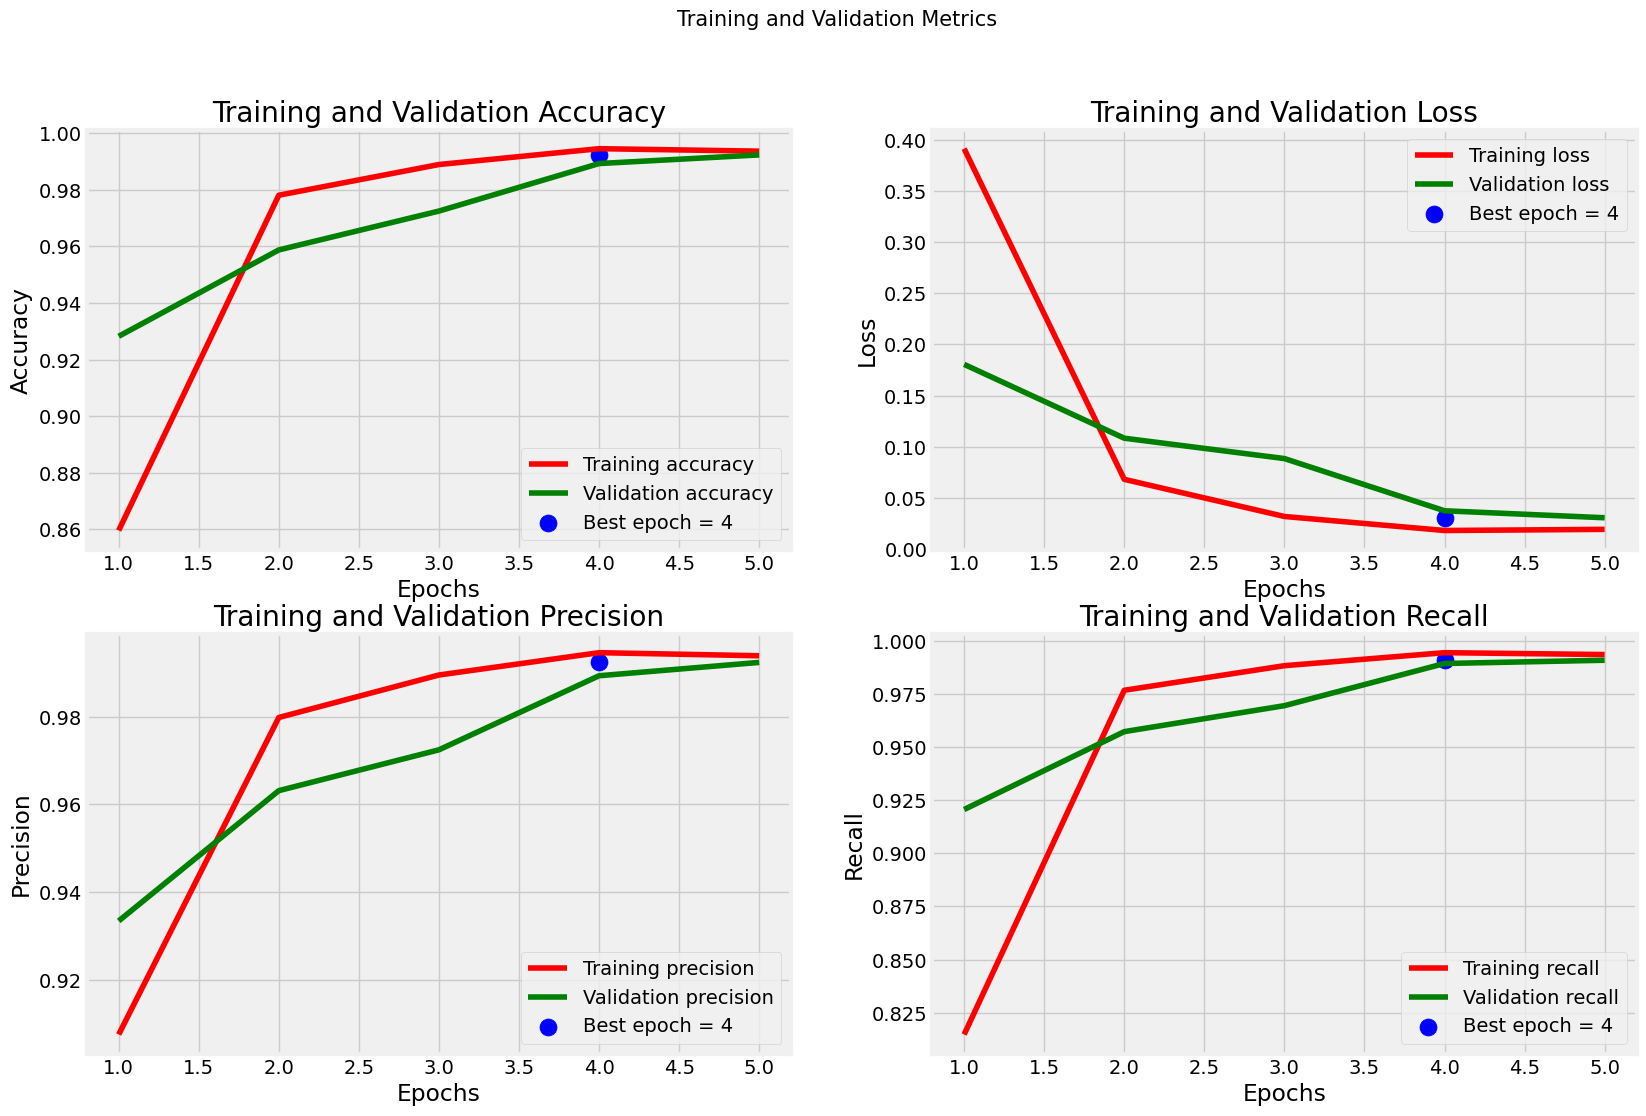

In [ ]:
#Get training and validation metrics from history
metrics = ['accuracy','loss','precision','recall']
train_metrics = {m:hist.history[m] for m in metrics}
valid_metrics = {m:hist.history[f'val_{m}'] for m in metrics}

# train_metrics_df = pd.DataFrame(train_metrics)
# valid_metrics_df = pd.DataFrame(valid_metrics)

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(valid_metrics[m])
  else:
    idx = np.argmax(valid_metrics[m])
  best_epochs[m] = idx
  best_values[m] = valid_metrics[m][idx]

#Plot metrics
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i,metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(train_metrics[metric])+1)

  plt.plot(epochs,train_metrics[metric] , 'r' ,label = f'Training {metric}' )
  plt.plot(epochs,valid_metrics[metric] , 'g' , label = f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',label = f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)


plt.suptitle('Training and Validation Metrics',fontsize = 15)
plt.show()

In [ ]:
#evaluating models
train_score = model.evaluate(tr_gen,verbose = 1)
valid_score = model.evaluate(valid_gen,verbose = 1)
test_score = model.evaluate(ts_gen,verbose = 1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTesting Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 244ms/step - accuracy: 0.9986 - loss: 0.0043 - precision: 0.9988 - recall: 0.9986
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9910 - loss: 0.0177 - precision: 0.9918 - recall: 0.9910
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 1.0000 - loss: 0.0390 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9973 - loss: 0.0174 - precision: 0.9989 - recall: 0.9973
Training Accuracy: 99.91%
Training loss: 0.0038


Validation Accuracy: 98.93%
Validation loss: 0.0286


Testing Accuracy: 99.70%
Testing loss: 0.0118


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step


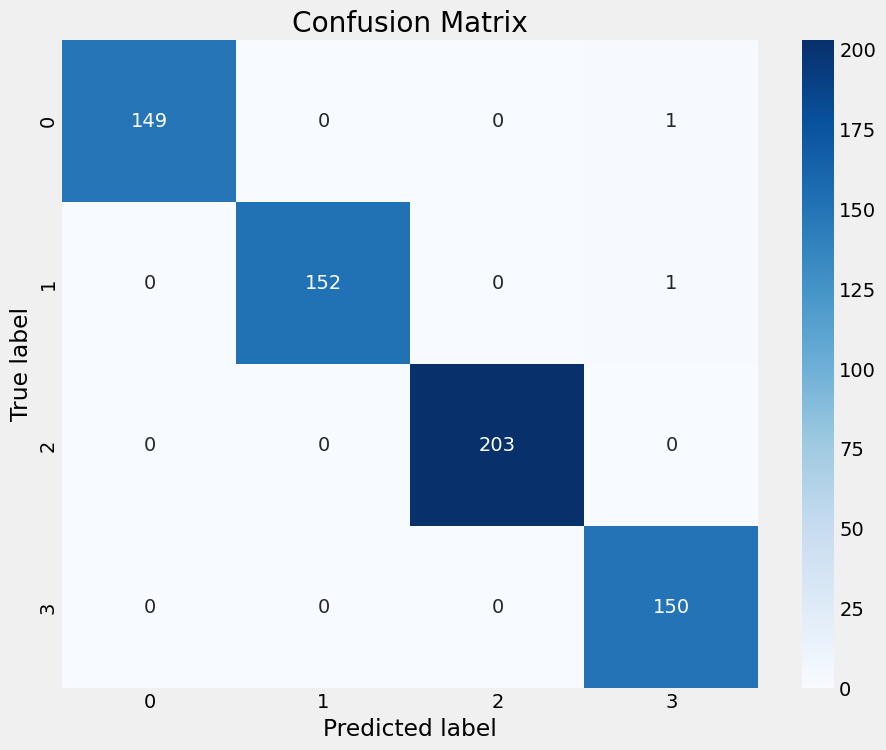

In [ ]:
#To predict where our model is succes and where it is making mistakes
preds = model.predict(ts_gen) # model is generating the probability values fro each class based on testing data
y_preds = np.argmax(preds,axis = 1) #selecting the maximum probability distribution class and converting these probability values to actual predictions.

class_dict = {
    0 : "glioma",
    1 : "meningioma",
    2 : "no_tumor",
    3 : "pituitary"
}

#Create and display the confusion matrix - this matrix will show how many predictions were correct and incorrect for each class.
cm = confusion_matrix(ts_gen.classes,y_preds)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True,fmt = 'd',xticklabels = labels,yticklabels = labels,cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#visualize the predictions of our model on a few test images
from PIL import Image

def predict(image_path:str ) -> None:
  #Get the class labels
  labels = list(class_dict.keys())

  #create figure
  plt.figure(figsize = (6,8))

  #load and pre-process image
  img = Image.open(image_path)
  resized_image = img.resize((299,299))
  image_array = np.asarray(resized_image)
  image_array = np.expand_dims(image_array,axis = 0) / 255.0

  #Get model predictions
  predictions = model.predict(image_array)
  probabilities = list(predictions[0])

  #Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_image)
  plt.title(f"Original Input MRI Image\n Predicted : {predicted_class}")

  #plot prediction probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels,probabilities)
  plt.xlabel("Probability",fontsize = 15)
  plt.title("Class Probabilities")

  #Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars,fmt = "%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


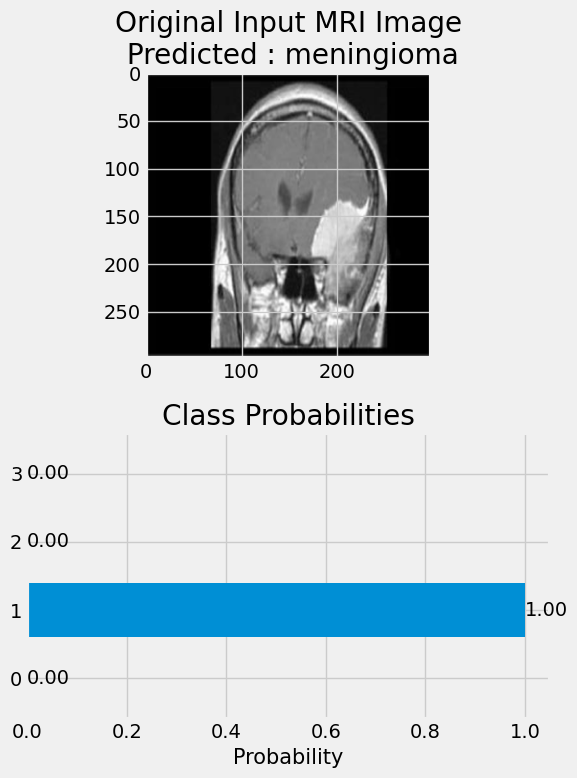


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


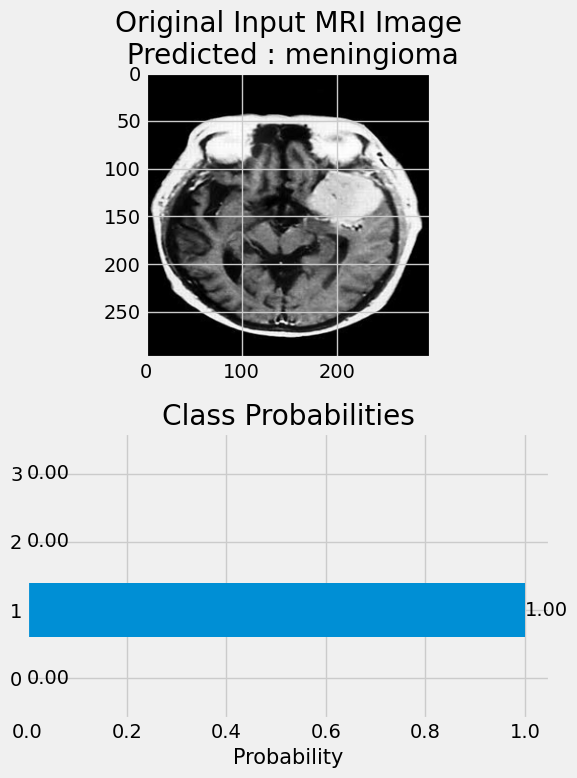


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


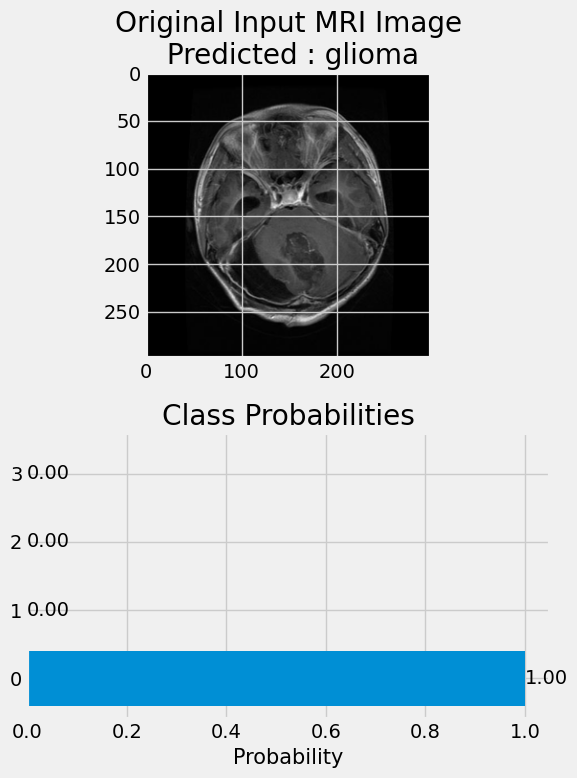


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
#Training a normal CNN model having fewer convo layers
#pre-process the dataset
batch_size = 16
img_size = (224,224,3)
image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))# rescale the image pixel values from (0 - 255) to (0 - 1) & randomly adjusts the brightness of images
ts_gen = ImageDataGenerator(rescale = 1/255)

#workflows
tr_gen = image_generator.flow_from_dataframe(tr_df,x_col = 'class path',y_col = 'class',batch_size = batch_size,target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,x_col = 'class path',y_col = 'class',batch_size = batch_size,target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col = 'class path',y_col = 'class',batch_size = 16,target_size = img_size,shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
#Create a sequential model
cnn_model = Sequential()

#Convolution layers
cnn_model.add(Conv2D(512, (3,3), padding = 'same', input_shape = (224,224,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the output for fully-connected layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense(256,activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation = 'softmax')) #output layer with 4 neurons to 4 classes

#Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy',Precision(),Recall()])

#Display the model summary
cnn_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, validation_data= valid_gen, epochs= 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 148s 343ms/step - accuracy: 0.5512 - loss: 2.1479 - precision_1: 0.6831 - recall_1: 0.3667 - val_accuracy: 0.7496 - val_loss: 0.7979 - val_precision_1: 0.7907 - val_recall_1: 0.6977
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 160s 291ms/step - accuracy: 0.7959 - loss: 0.7162 - precision_1: 0.8227 - recall_1: 0.7598 - val_accuracy: 0.7863 - val_loss: 0.7076 - val_precision_1: 0.8078 - val_recall_1: 0.7573
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 107s 298ms/step - accuracy: 0.8591 - loss: 0.5185 - precision_1: 0.8731 - recall_1: 0.8417 - val_accuracy: 0.8443 - val_loss: 0.5222 - val_precision_1: 0.8617 - val_recall_1: 0.8275
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 291ms/step - accuracy: 0.8867 - loss: 0.4427 - precision_1: 0.8948 - recall_1: 0.8769 - val_accuracy: 0.8840 - val_loss: 0.4877 - val_precision_1: 0.8960 - val_recall_1: 0.8550
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 299ms/step - accuracy: 0.9126 - loss: 0.3731 - precision_1: 0.9209 - recall_1:

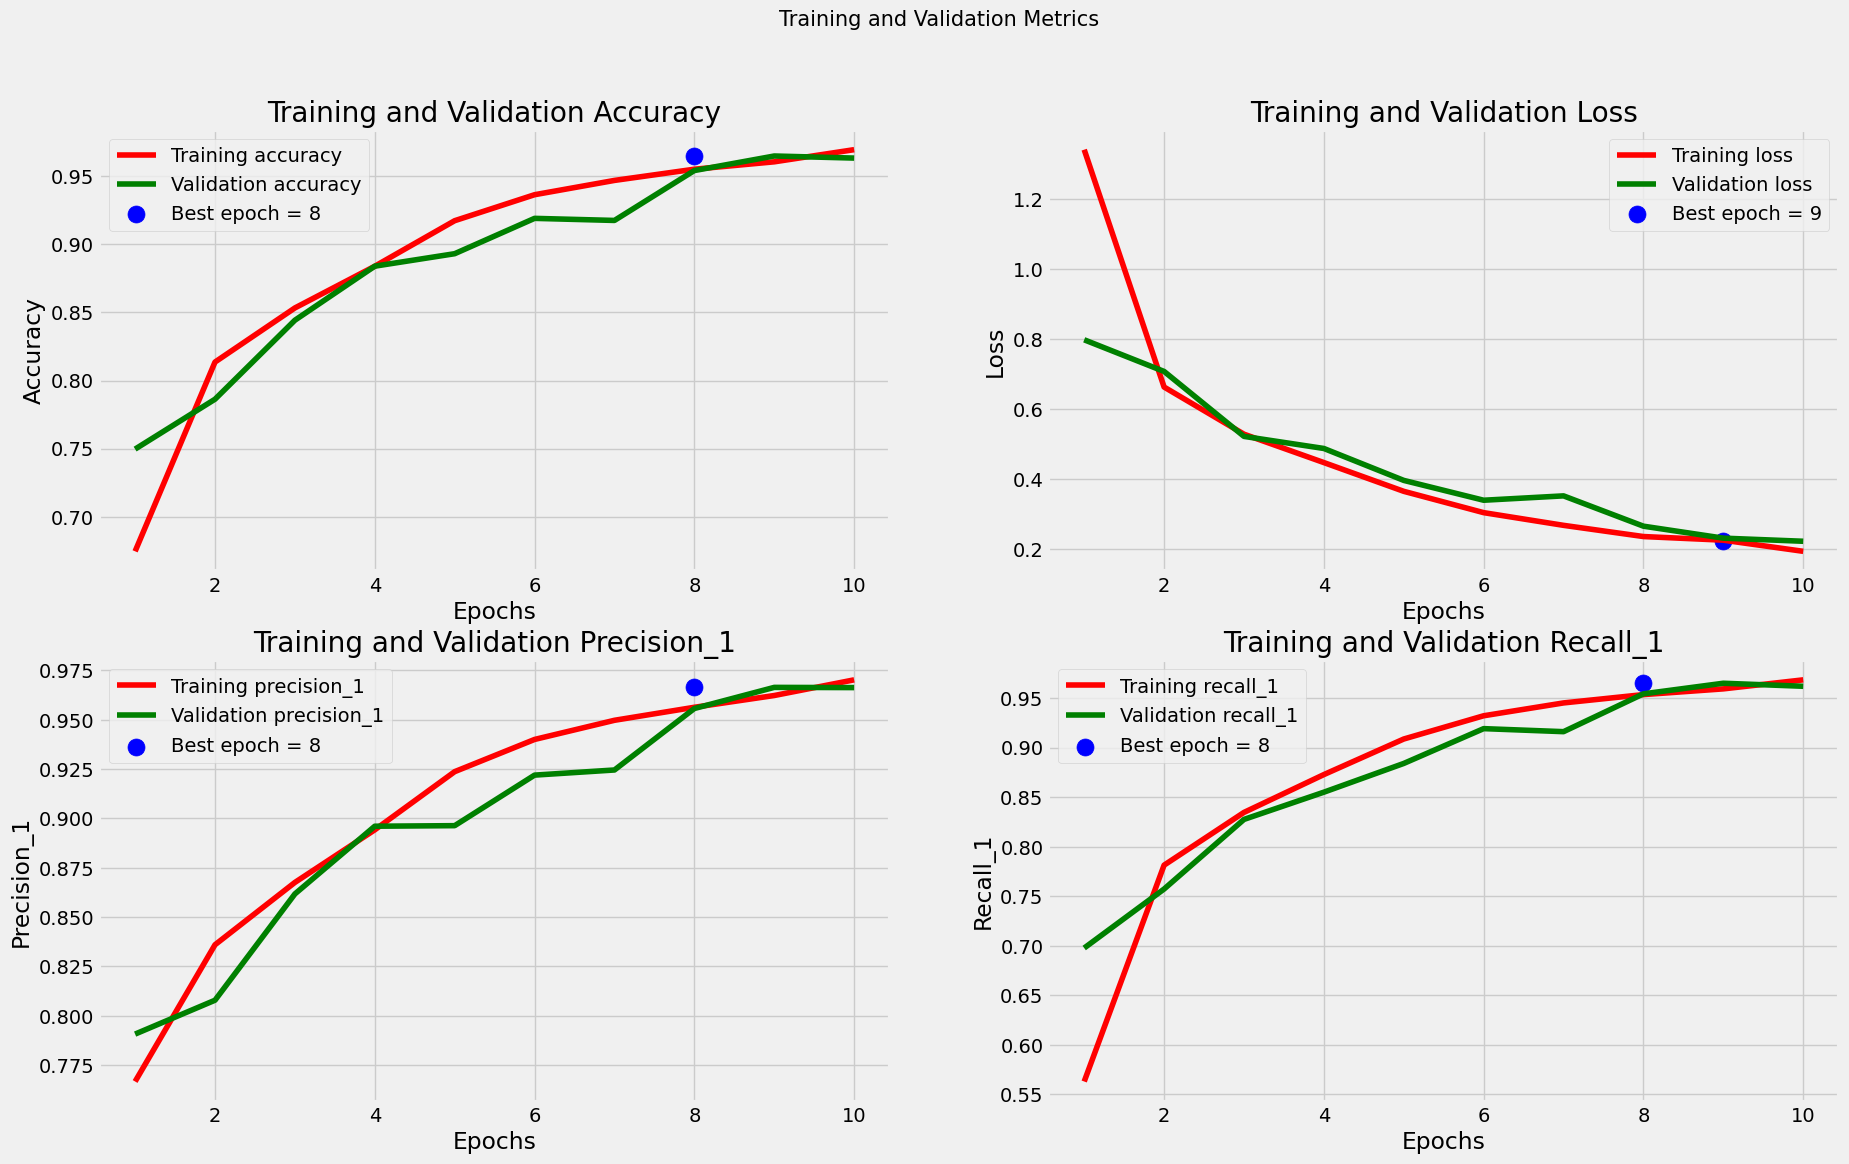

In [ ]:
#Get training and validation metrics from history
metrics = ['accuracy','loss','precision_1','recall_1']
train_metrics = {m:history.history[m] for m in metrics}
valid_metrics = {m:history.history[f'val_{m}'] for m in metrics}

# train_metrics_df = pd.DataFrame(train_metrics)
# valid_metrics_df = pd.DataFrame(valid_metrics)

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(valid_metrics[m])
  else:
    idx = np.argmax(valid_metrics[m])
  best_epochs[m] = idx
  best_values[m] = valid_metrics[m][idx]

#Plot metrics
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i,metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(train_metrics[metric])+1)

  plt.plot(epochs,train_metrics[metric] , 'r' ,label = f'Training {metric}' )
  plt.plot(epochs,valid_metrics[metric] , 'g' , label = f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',label = f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)


plt.suptitle('Training and Validation Metrics',fontsize = 15)
plt.show()

In [ ]:
#evaluating models
train_score = cnn_model.evaluate(tr_gen,verbose = 1)
valid_score = cnn_model.evaluate(valid_gen,verbose = 1)
test_score = cnn_model.evaluate(ts_gen,verbose = 1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTesting Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing loss: {test_score[0]:.4f}")


357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.9924 - loss: 0.1380 - precision_1: 0.9926 - recall_1: 0.9917
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9624 - loss: 0.2132 - precision_1: 0.9656 - recall_1: 0.9606
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9062 - loss: 0.2308 - precision_1: 0.9062 - recall_1: 0.9062 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9541 - loss: 0.2255 - precision_1: 0.9541 - recall_1: 0.9541
Training Accuracy: 99.19%
Training loss: 0.1398


Validation Accuracy: 96.34%
Validation loss: 0.2208


Testing Accuracy: 95.73%
Testing loss: 0.2119


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


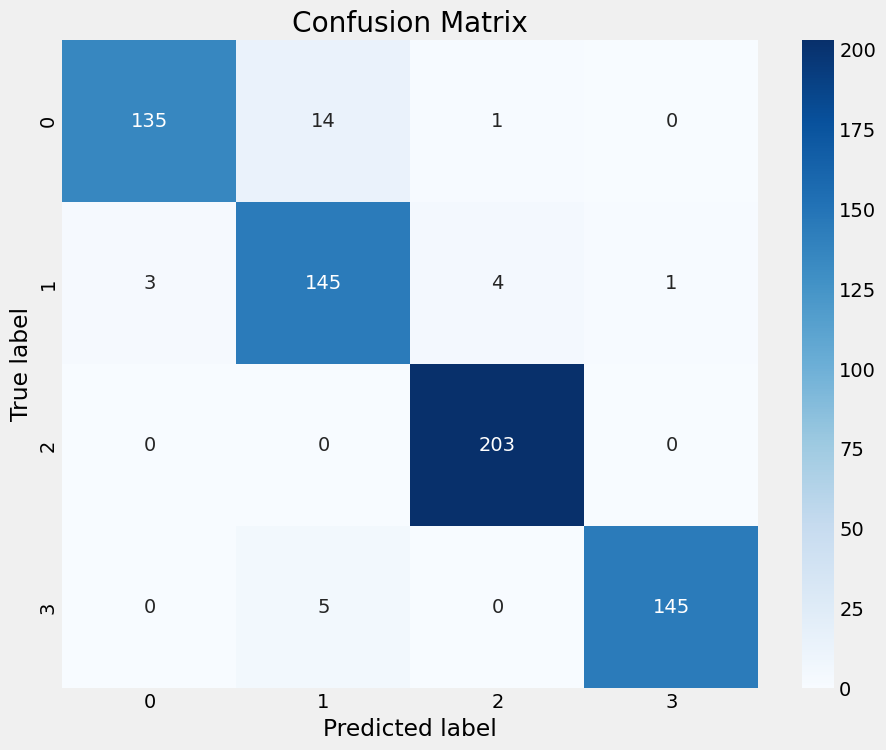

In [ ]:
#To predict where our model is succes and where it is making mistakes
preds = cnn_model.predict(ts_gen) # model is generating the probability values fro each class based on testing data
y_preds = np.argmax(preds,axis = 1) #selecting the maximum probability distribution class and converting these probability values to actual predictions.

class_dict = {
    0 : "glioma",
    1 : "meningioma",
    2 : "notumor",
    3 : "pituitary"
}

#Create and display the confusion matrix - this matrix will show how many predictions were correct and incorrect for each class.
cm = confusion_matrix(ts_gen.classes,y_preds)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True,fmt = 'd',xticklabels = labels,yticklabels = labels,cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes,y_preds)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       150
           1       0.88      0.95      0.91       153
           2       0.98      1.00      0.99       203
           3       0.99      0.97      0.98       150

    accuracy                           0.96       656
   macro avg       0.96      0.95      0.95       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
cnn_model.save("cnn_model.h5")

Part 2 : Streamlit Web app .

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('ngrok_API_key')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision,Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on based on the saliency map. Refer to the regions highlighted
      in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don’t mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
      in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img



def load_xception_model(model_path):
    img_shape = (299,299,3)
    base_model = tf.keras.applications.Xception(include_top = False,weights = 'imagenet',input_shape = img_shape,pooling = 'max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate = 0.3),
        Dense(128,activation = 'relu'),
        Dropout(rate = 0.25),
        Dense(4,activation = 'softmax')
    ])

    model.build((None,) +img_shape)

    #Compile the model
    model.compile(Adamax(learning_rate = 0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy',Precision(),Recall()]
                  )

    model.load_weights(model_path)
    return model

st.title("Brain Tumor Classification")
st.write("Upload an image of brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose an image",type = ['jpg','jpeg','png'])

if uploaded_file is not None:
    selected_model = st.radio("Select Model",("Transfer Learning Model-Xception","CNN Model"))
    if selected_model == "Transfer Learning Model-Xception":
      model = load_xception_model("/content/xception_model.weights.h5")
      img_size = (299,299)
    else:
      model = load_model("/content/cnn_model.h5")
      img_size = (224,224)

    labels = ['Glioma','Meningioma','Notumor','Pituitary']
    img = image.load_img(uploaded_file,target_size = img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis = 0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    #Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label,prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")


    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1,col2 = st.columns(2)
    with col1:
      st.image(img,caption = "Uploaded Image",use_container_width = True)
    with col2:
      st.image(saliency_map,caption = "Saliency Map",use_container_width = True)

    st.write("## Classification Results")
    result_container = st.container()
    result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">{result}</p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">{prediction[0][class_index]:.4%}</p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)



    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path,result,prediction[0][class_index])

    st.write(f"## Explanation:")
    st.write(explanation)


Writing app.py


In [ ]:
import os
thread = Thread(target = run_streamlit)
thread.start()

public_url = ngrok.connect(addr = '8501' ,proto = 'http', bind_tls = True)
print("Public URL:",public_url)

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

In [ ]:
%%writefile .env

GOOGLE_API_KEY = ""

Writing .env
